<div style="text-align: right">  <font size="5"> FIT1043 - Introduction to Data Science  </div>

<div style="text-align: right">  <font size="5">  Assignment 1 </div>
<div style="text-align: right">Timothy Wee Yan Yi  </div>
<div style="text-align: right">31965830  </div>

--- 



<h2 style="text-align: center">  Introduction </h2>

As we cross the first year anniversary of a global lockdown-quarantine-lifetstyle, we are finally seeing the light at the end of the tunnel. As vaccination rollout begins globally, it is important to understand the data that is being presented as it can show us trends and insights that can help understand the vaccination process. This assignment works with data taken from Kaggle and there are multiple insights to be seen. 

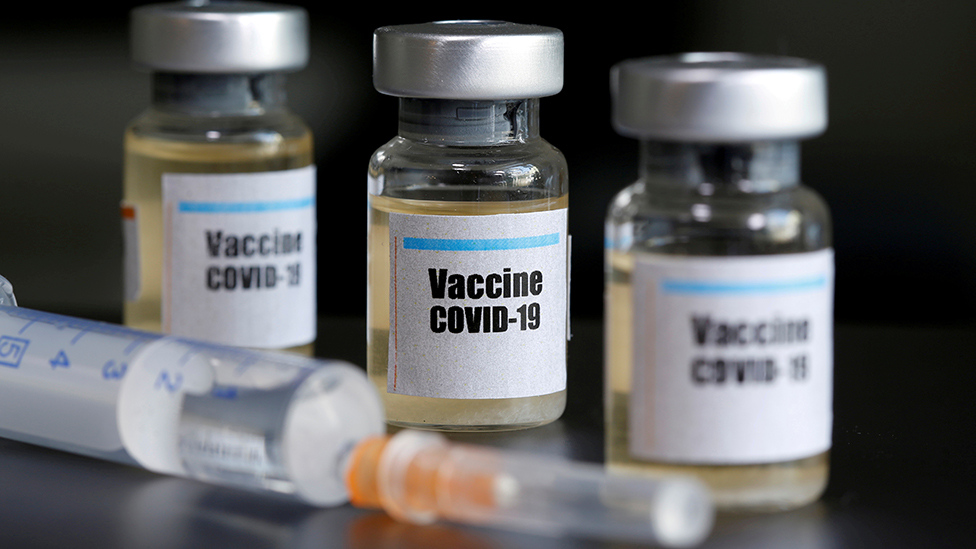

<h3 style="text-align: center">  Importing Libraries </h3>

We will be importing 3 libraries in this assignment. The first would be **Pandas** which is an open source library with many data science functions and tools. The second would be **Mathlibplot** which is used to draw plots and diagrams and lastly **Numpy** which is a library to create arrays.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


<h3 style="text-align: left">  Reading the files </h3>

We will be reading the files using pandas. There are 3 csv files to read from.

2019-GDP.csv 

2020-Population.csv

Vaccinations.csv


In [2]:
gdp = pd.read_csv("data/2019-GDP.csv", skiprows = 3, )
pop = pd.read_csv("data/2020-Population.csv", skiprows = 16)
vaccine = pd.read_csv("data/Vaccinations.csv")

In [3]:
#Create a new dataframe containing south east asia countries 
filt = {"daily_vaccinations" : "sum", "people_fully_vaccinated" : "max"} #filter which aggregates sum
vaccineGroup = vaccine.groupby(["country", "vaccines",]).agg(filt).reset_index() #new dataframe 
vaccineGroup.rename(
columns = {
"daily_vaccinations" : "total_vaccinations", "country" : "Country" },
inplace = True
)
sea_lst = ["Brunei Darussalam", "Myanmar", "Cambodia","Timor-Leste","Indonesia","Lao PDR", "Lao People's Democratic Republic","Malaysia","Philippines","Viet Nam", "Singapore","Thailand","Vietnam"]
vaccineSEA = vaccineGroup[vaccineGroup["Country"].isin(sea_lst)] #Get the rows containing SEA countries only 
vaccineSEA = vaccineSEA.reset_index()


#cleaning the GDP.csv
gdp.drop(labels = [0], axis = 0, inplace= True)
gdp = gdp.rename(columns={"US dollars)" : "GDP in USD", "Economy" : "Country"})
gdp = gdp[["Country", "GDP in USD"]]
gdpSEA = gdp[gdp["Country"].isin(sea_lst)] #Get the rows containing SEA countries only 
gdpSEA = gdpSEA.reset_index()
gdpSEA = gdpSEA.replace(to_replace ="Lao PDR", value ="Laos") #Change the name for a more streamline dataframe 

#cleaning population.csv
pop = pop[["Region, subregion, country or area *", "2020", "2019"]]
pop = pop.rename(columns= {
    "2020" : "Population in 2020 (thousands)"
})
popSEA = pop[pop["Region, subregion, country or area *"].isin(sea_lst)] #Get the rows containing SEA countries only 
popSEA = popSEA.reset_index()
popSEA = popSEA.replace({'Region, subregion, country or area *' : 
                        {"Lao People's Democratic Republic" : "Laos", 
                        "Viet Nam" : "Vietnam"}}) #Change the name for a more streamline dataframe
popSEA = popSEA.rename(columns = {"Region, subregion, country or area *" : "Country"})

#merge population and gdp 
popgdpSEA = pd.merge(popSEA, gdpSEA, on='Country', how= "left",  sort = True)
popgdpSEA = popgdpSEA.drop(['index_x', 'index_y'], axis=1)
popgdpSEA['GDP in USD'] = popgdpSEA['GDP in USD'].str.replace(',', '')
popgdpSEA['2019'] = popgdpSEA['2019'].str.replace(' ', '')
popgdpSEA['Population in 2020 (thousands)'] = popgdpSEA['Population in 2020 (thousands)'].str.replace(' ', '')
popgdpSEA = popgdpSEA.rename(columns = {"GDP in USD" : "GDP in USD (millions)"})
popgdpSEA['Population in 2020 (thousands)'] = popgdpSEA['Population in 2020 (thousands)'].astype('int') #changes data type to integer 
popgdpSEA['2019'] = popgdpSEA['2019'].astype('int') #Change to integer type to perform mathematical operations
popgdpSEA['GDP in USD (millions)'] = popgdpSEA['GDP in USD (millions)'].astype('int') #Change to integer type to perform mathematical operations
popgdpSEA['GDP per Capita'] = popgdpSEA['GDP in USD (millions)'] / popgdpSEA['2019']
popgdpSEA['GDP per Capita'] = popgdpSEA['GDP per Capita'].apply(lambda x: x*1000) #get proper GDP 
popgdpSEA['GDP in USD (millions)'] = popgdpSEA['GDP in USD (millions)'] / 100 #represent number in millions 

SEAvac = pd.merge(popgdpSEA, vaccineSEA, on='Country', how= "left",  sort = True)
SEAvac = SEAvac.drop(['index'], axis=1)
SEAvac = SEAvac.drop(['2019'], axis=1)
SEAvac["Population vaccinated(%)"] = (((SEAvac['total_vaccinations'] / 1000) / (SEAvac['Population in 2020 (thousands)'])) * 100 )
SEAvac = SEAvac.rename(columns = {"GDP per Capita" : "GDP per Capita (2019)"})






In [4]:
SEAvac

,Country,Population in 2020 (thousands),GDP in USD (millions),GDP per Capita (2019),vaccines,total_vaccinations,people_fully_vaccinated,Population vaccinated(%)
0,Brunei Darussalam,437,134.69,31106.235566,NaN,NaN,NaN,NaN
1,Cambodia,16719,270.89,1643.052102,Sinopharm/Beijing,8171.0,NaN,0.048873
2,Indonesia,273524,11191.91,4135.563471,Sinovac,2022788.0,825650.0,0.739529
3,Laos,7276,181.74,2535.081601,NaN,NaN,NaN,NaN
4,Malaysia,32366,3647.02,11414.773083,NaN,NaN,NaN,NaN
5,Myanmar,54410,760.86,1407.826811,Oxford/AstraZeneca,82823.0,NaN,0.152220
6,Philippines,109581,3767.96,3485.076352,NaN,NaN,NaN,NaN
7,Singapore,5850,3720.63,64104.583046,Pfizer/BioNTech,329630.0,110000.0,5.634701
8,Thailand,69800,5436.50,7808.146382,NaN,NaN,NaN,NaN
9,Timor-Leste,1318,16.74,1294.663573,NaN,NaN,NaN,NaN


In [5]:
SEAvac.describe()

,Population in 2020 (thousands),GDP in USD (millions),GDP per Capita (2019),total_vaccinations,people_fully_vaccinated,Population vaccinated(%)
count,11.000000,11.000000,11.000000,4.000000e+00,2.000000,4.000000
mean,60783.636364,2886.195455,11968.207134,6.108530e+05,467825.000000,1.643831
std,80564.112295,3347.960303,19344.372848,9.512602e+05,506040.967956,2.677910
min,437.000000,16.740000,1294.663573,8.171000e+03,110000.000000,0.048873
25%,6563.000000,226.315000,2089.066851,6.416000e+04,288912.500000,0.126383
50%,32366.000000,2619.210000,3485.076352,2.062265e+05,467825.000000,0.445874
75%,83569.500000,3744.295000,9611.459733,7.529195e+05,646737.500000,1.963322
max,273524.000000,11191.910000,64104.583046,2.022788e+06,825650.000000,5.634701


Based on our aggregrated data we can observe some statistics related to the South East Asian nations.  
First off, relating to the vaccination process, only 4 out of the 11 nations are vaccinated and only 2 countries have people fully vaccinated. 

Indonesia is leading the way with over 2 million doses of vaccination given with Singapore having the highest percentage of the population getting vaccinated. This is due to the low population size and high population density which removes the logistical problem of giving the vaccines as everyone is living in Singapore City. 

In terms of GDP, the mean GDP of the region is about 2.8 billion USD with Indonesia having the greatest GDP of over 1 trillion. However, Singapore has the highest GDP per capita at 63,600 USD. 




### Vaccine for all - Question 1 

The table and chart below showcases the population that are currently taking the vaccine 

In [6]:
SEAvac1 = SEAvac.drop(['Population in 2020 (thousands)', 'GDP in USD (millions)', 'GDP per Capita (2019)', 'Population vaccinated(%)'], axis = 1)
SEAvac1['Percentage'] = (SEAvac1['total_vaccinations'] / (SEAvac1['total_vaccinations'].sum())) * 100 #Get percentage of vaccine
SEAvac1.groupby(["vaccines"]).sum()

,total_vaccinations,people_fully_vaccinated,Percentage
vaccines,,,
Oxford/AstraZeneca,82823.0,0.0,3.389645
Pfizer/BioNTech,329630.0,110000.0,13.490562
Sinopharm/Beijing,8171.0,0.0,0.334409
Sinovac,2022788.0,825650.0,82.785384


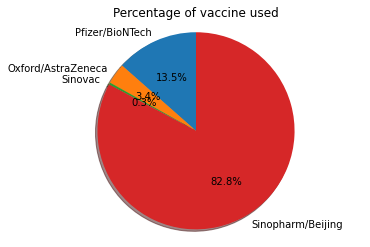

In [21]:
vaccine_type = ['Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Sinovac', 'Sinopharm/Beijing']
percentage = [13.490562, 3.389645, 0.334409, 82.785384]

fig1, ax1 = plt.subplots()
ax1.pie(percentage,labels=vaccine_type, autopct='%1.1f%%',
        shadow=True,startangle=90)
ax1.axis('equal') 
plt.title("Percentage of vaccine used")
plt.show()

A pie chart is used as it a graph that can show differences easily. Based on the pie chart above, we can see that Sinopharm/Bejing is the largest vaccine in the region, with Pfizer coming in second place. This is due to Indonesia's large population which took the Sinopharm vaccine. As the sample size is really small, it is impossible to tell which vaccine is the most popular among the SEA nations. 

Although the vaccines in the data only make up 4 countries, every country should eventually get their hands on a vaccine or better still multiple vaccines. We will be estimating total population vaccination on 4 different vaccines: Pfizer/BioNTech, Oxford/AstraZeneca, Sinovac and Sinopharm/Beijing. We also assume these vaccines are distributed equally thus we can assume that 1/4th of a country's population will recieve 1 type of vaccine. 

In [8]:
VACest = popSEA.drop(["index","2019"], axis = 1) #get SEA nations with population 
VACest['Population in 2020 (thousands)'] = VACest['Population in 2020 (thousands)'].str.replace(' ', '')
VACest['Population in 2020 (thousands)'] = VACest['Population in 2020 (thousands)'].astype('int') 
VACest['Pfizer/BioNTech'] = (VACest['Population in 2020 (thousands)'] ) / 4 
VACest['Oxford/AstraZeneca'] = (VACest['Population in 2020 (thousands)'] ) / 4 
VACest['Sinovac'] = (VACest['Population in 2020 (thousands)'] ) / 4 
VACest['Sinopharm/Beijing'] = (VACest['Population in 2020 (thousands)'] ) / 4 

In [9]:
VACest


,Country,Population in 2020 (thousands),Pfizer/BioNTech,Oxford/AstraZeneca,Sinovac,Sinopharm/Beijing
0,Brunei Darussalam,437,109.25,109.25,109.25,109.25
1,Cambodia,16719,4179.75,4179.75,4179.75,4179.75
2,Indonesia,273524,68381.00,68381.00,68381.00,68381.00
3,Laos,7276,1819.00,1819.00,1819.00,1819.00
4,Malaysia,32366,8091.50,8091.50,8091.50,8091.50
5,Myanmar,54410,13602.50,13602.50,13602.50,13602.50
6,Philippines,109581,27395.25,27395.25,27395.25,27395.25
7,Singapore,5850,1462.50,1462.50,1462.50,1462.50
8,Thailand,69800,17450.00,17450.00,17450.00,17450.00
9,Timor-Leste,1318,329.50,329.50,329.50,329.50


Note: All vaccinated population is in thousands 

The table above showcases the estimate number of people in each country that will get each type of vaccine. Given it will be distributed equally among the nations, each vaccine should vaccine 25% of the population. Its also no secret that the larger a country's population the larger the number of people which will get vaccinated. Although the data visualization may seem relatively simple, this does not show an accurate estimate for a vaccinated population. 

First and foremost as there is currently no vaccine approved by the FDA for children and pre-teens(“COVID-19 Vaccination Information for Kids & Teens | Boston Children’s Hospital,” 2017), therefore is a possibility that they may not be vaccinated. There may be people who are allergic or may not want to get vaccinated due to personal reasons which will reduce the number of people being vaccinated in each country. Furthermore logistical issues may arise for certain countries where people living in rural areas may not get access to the vaccine. These factors may reduce the vaccinated populations for certian countries. Lastly the data does not show how fast a country's population will get vaccinated as that is crucial to reach heard immunity. 

## Vaccinations and Total Vaccinations - Question 2 


We will now plot bar charts for vaccines in relation to the SEA countries. 

<AxesSubplot:>

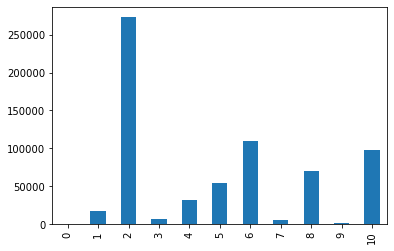

In [10]:
 VACest['Population in 2020 (thousands)'].plot(kind="bar")

The bar chart is an inapropriate method of displaying data as there is large differences in the values which leads to poor visual comparisons. A better method is displayed below

In [11]:
SEAvac


,Country,Population in 2020 (thousands),GDP in USD (millions),GDP per Capita (2019),vaccines,total_vaccinations,people_fully_vaccinated,Population vaccinated(%)
0,Brunei Darussalam,437,134.69,31106.235566,NaN,NaN,NaN,NaN
1,Cambodia,16719,270.89,1643.052102,Sinopharm/Beijing,8171.0,NaN,0.048873
2,Indonesia,273524,11191.91,4135.563471,Sinovac,2022788.0,825650.0,0.739529
3,Laos,7276,181.74,2535.081601,NaN,NaN,NaN,NaN
4,Malaysia,32366,3647.02,11414.773083,NaN,NaN,NaN,NaN
5,Myanmar,54410,760.86,1407.826811,Oxford/AstraZeneca,82823.0,NaN,0.152220
6,Philippines,109581,3767.96,3485.076352,NaN,NaN,NaN,NaN
7,Singapore,5850,3720.63,64104.583046,Pfizer/BioNTech,329630.0,110000.0,5.634701
8,Thailand,69800,5436.50,7808.146382,NaN,NaN,NaN,NaN
9,Timor-Leste,1318,16.74,1294.663573,NaN,NaN,NaN,NaN


In [12]:
SEAvac1 = SEAvac[['Country', 'Population in 2020 (thousands)','total_vaccinations', 'people_fully_vaccinated']]

In [13]:
SEAvac1

,Country,Population in 2020 (thousands),total_vaccinations,people_fully_vaccinated
0,Brunei Darussalam,437,NaN,NaN
1,Cambodia,16719,8171.0,NaN
2,Indonesia,273524,2022788.0,825650.0
3,Laos,7276,NaN,NaN
4,Malaysia,32366,NaN,NaN
5,Myanmar,54410,82823.0,NaN
6,Philippines,109581,NaN,NaN
7,Singapore,5850,329630.0,110000.0
8,Thailand,69800,NaN,NaN
9,Timor-Leste,1318,NaN,NaN


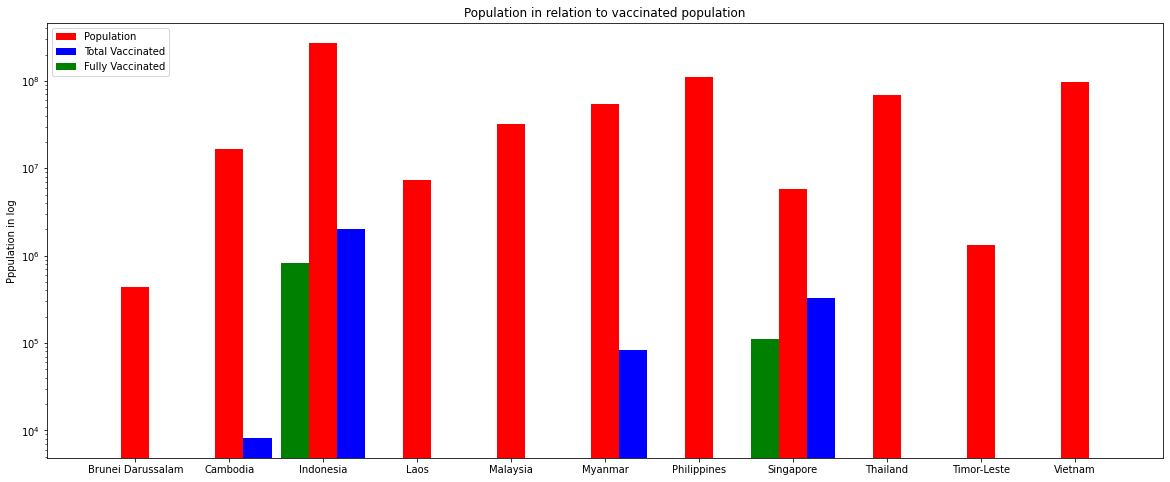

In [14]:
#creating a bar chart
SEAvac1 = SEAvac1.reset_index().set_index('Country')
pop = SEAvac1['Population in 2020 (thousands)'] * 1000
vac = SEAvac1['total_vaccinations'] 
tot = SEAvac1['people_fully_vaccinated']
index = ['Brunei Darussalam','Cambodia','Indonesia','Laos','Malaysia','Myanmar','Philippines','Singapore','Thailand','Timor-Leste', 'Vietnam']
plt.figure(figsize=(20,8))
width =0.3
popar = pop.to_numpy() #create numpy array
vacar = vac.to_numpy()
totar = tot.to_numpy()
plt.bar(np.arange(len(popar)), pop, width=width, color = 'r', log = 1 )
plt.bar(np.arange(len(vacar))+ width, vac, width=width, color = 'b', log = 1)
plt.bar(np.arange(len(totar)) -(width), tot, width=width, color = 'g', log = 1)
plt.bar(index, [0])
plt.title("Population in relation to vaccinated population")
plt.ylabel("Pppulation in log")

plt.legend(labels=('Population', 'Total Vaccinated', 'Fully Vaccinated'), loc='upper left', borderaxespad=0.5) #add labels 
plt.show()

This new and improved version of the graph uses a logarithmic scale, which is a non-linear scale that scales things with log making it easier to visually display the graph. With this we are able to visually identify key insights. 

Based on the bar chart above we can see that Indonesia, with the highest population, also has the highest number of people vaccinated and fully vaccinated. Both Cambodia and Myanmar only has people vaccinated but no one fully vaccinated, this is not ideal as some vaccines require 2 doses to get the desired protection (CDC, 2020). 

It is possible for this data to be misleading due to the purpose of vaccines. Although the goal is to get as many people vaccinated as possible, it is also important for entire populations to get vaccinated to achieve herd immunity(Yu, 2020). This data does show that Indonesia is leading the way to herd immunity due to its high vaccine count, however in reality, only a small fraction of the population is actually vaccinated which increases the chance of COVID to spread in a country with hundreds of millions of people. A bar chart below shows the percentage of a population that is vaccinated. 

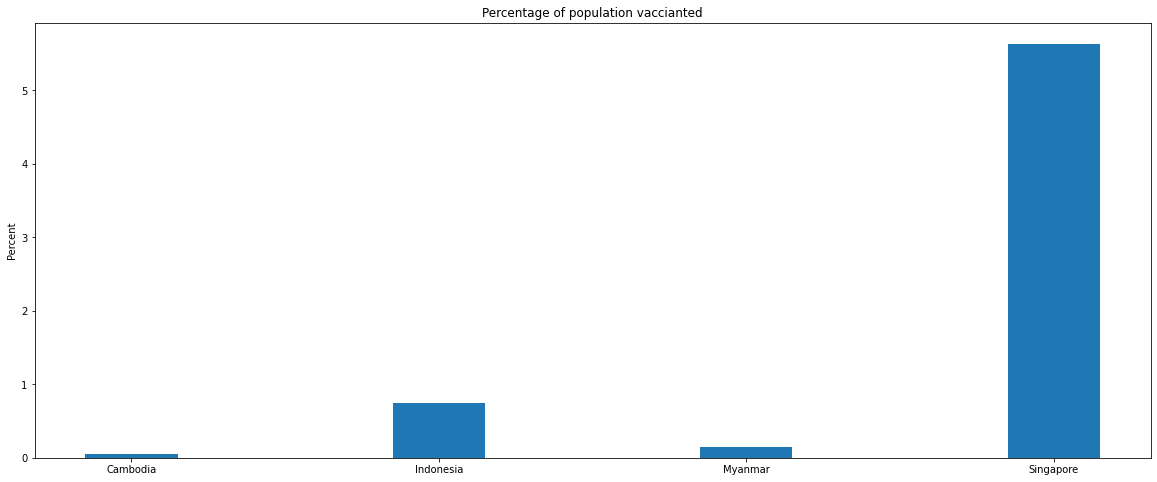

In [15]:
#Create bar chart with percentage 
SEAper = SEAvac['Population vaccinated(%)'].dropna()
perAR = SEAper.to_numpy()
index = ['Cambodia','Indonesia', 'Myanmar', 'Singapore']
plt.figure(figsize=(20,8))
width = 0.3
plt.bar(index, perAR, width = width)
plt.title("Percentage of population vaccianted")
plt.ylabel("Percent")
plt.show()

This bar chart tells a different story with Singapore leading the way in reaching herd immunity. This is due to its small population size and high GDP per capita which allows Singapore to buy vacccines faster than its neighbours. 

## Vaccination in Singapore - Question 3

We will now plot line charts to represent the vaccination over time 

In [19]:
#create new dataframe for vaccinations over time in Singapore 
vaccineSG = vaccine[vaccine.country == "Singapore"]
vaccineSG = vaccineSG[['country','daily_vaccinations']]
vaccineSG = vaccineSG.reset_index().drop(['index'], axis=1)
vaccineSG['cumulative_vaccinations'] = 0
i = 1
while i < len(vaccineSG): #while loop to add daily vaccinations 
    vaccineSG['cumulative_vaccinations'].iloc[i] = vaccineSG['daily_vaccinations'].iloc[i] + vaccineSG['cumulative_vaccinations'].iloc[i-1]
    i+= 1

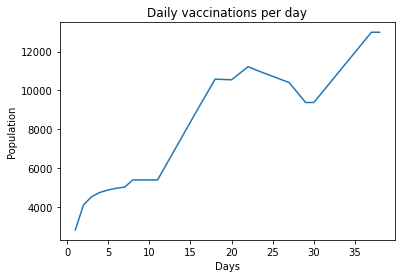

In [17]:
#plotting line plot 
plt.plot(vaccineSG['daily_vaccinations'])
plt.title("Daily vaccinations per day")
plt.ylabel("Population")
plt.xlabel("Days")
plt.show()

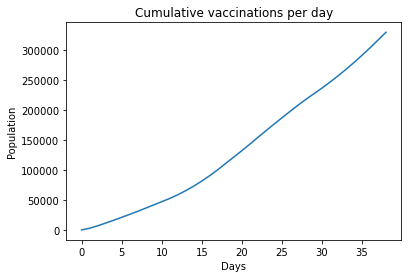

In [18]:
#plotting line plot 
plt.plot(vaccineSG['cumulative_vaccinations'])
plt.title("Cumulative vaccinations per day")
plt.ylabel("Population")
plt.xlabel("Days")
plt.show()

There are use cases for each of the graphs created. The first graph (daily vaccinations per day) can be used to keep track of vaccinations that happen on a daily basis. Ideally the daily vaccinations should go up over time to ensure people are getting vaccinated faster and any downward trend in daily vaccinations could indicate a problem that needs immediate attention such as shortage of vaccines available. 

The second graph (cumulative vaccinations per day) can be used to keep track of the percentage of the population that is currently vaccinated. An ideal senario should show exponential growth in the graph as more and more people get vaccinated daily. A plataeu in the graph could signal that it has either reached max vaccinations or there is a percentage of the population that is not currently vaccinated and needs to be addressed quickly. 

Based on the current trends of the graph Singapore is doing well in terms of vaccinating their population due to the upward trend in both graphs.

## Not the end 

As vaccine rollout is an ongoing procedure, it is import to take into account new developments of vaccines and setbacks that will change the data above. Factors like newly discovered vaccine side-effects and logistical issues can also shift the current trends and with the help of clear data analytics, new insights can be discovered in our fight against Covid-19.

Although it may seem that the world is getting vaccinated, only certain developed nations are getting all the resources, leaving the rest of the world waiting for their vaccine supply to arrive. This uneven distribution may cause countries without vaccination to be left out on "travel bubbles" (COVID-19 Travel Bubbles - Boom or Bust? | Lexology, 2021) which further hurts the economies of the countries that are left out. Moreover poorer countries do not have advance healthcare systems to fight Covid-19 thus a slow vaccine rollout can cause serious harm to the people. This could create a global divide, one that does not unite us as humans. 

## References 

COVID-19 Vaccination Information for Kids & Teens | Boston Children’s Hospital. (2017). Retrieved March 24, 2021, from Childrenshospital.org website: https://www.childrenshospital.org/conditions-and-treatments/conditions/c/coronavirus/vaccine

COVID-19 Travel Bubbles - Boom or Bust? | Lexology. (2021, January 20). COVID-19 Travel Bubbles - Boom or Bust? Retrieved March 27, 2021, from Lexology.com website: https://www.lexology.com/library/detail.aspx?g=d80cd144-4fbc-441d-a1f2-7fe78f90b39b

CDC. (2020, February 11). COVID-19 Vaccines that Require 2 Shots. Retrieved March 26, 2021, from Centers for Disease Control and Prevention website: https://www.cdc.gov/coronavirus/2019-ncov/vaccines/second-shot.html#:~:text=If%20you%20receive%20a%20Pfizer,you%20not%20to%20get%20it.

Yu, C. (2020, March 23). What Is Herd Immunity? Retrieved March 31, 2021, from WebMD website: https://www.webmd.com/lung/what-is-herd-immunity#1



Code references from the documentation of Pandas and Matplotlib 
https://pandas.pydata.org/docs/
https://matplotlib.org/stable/contents.html